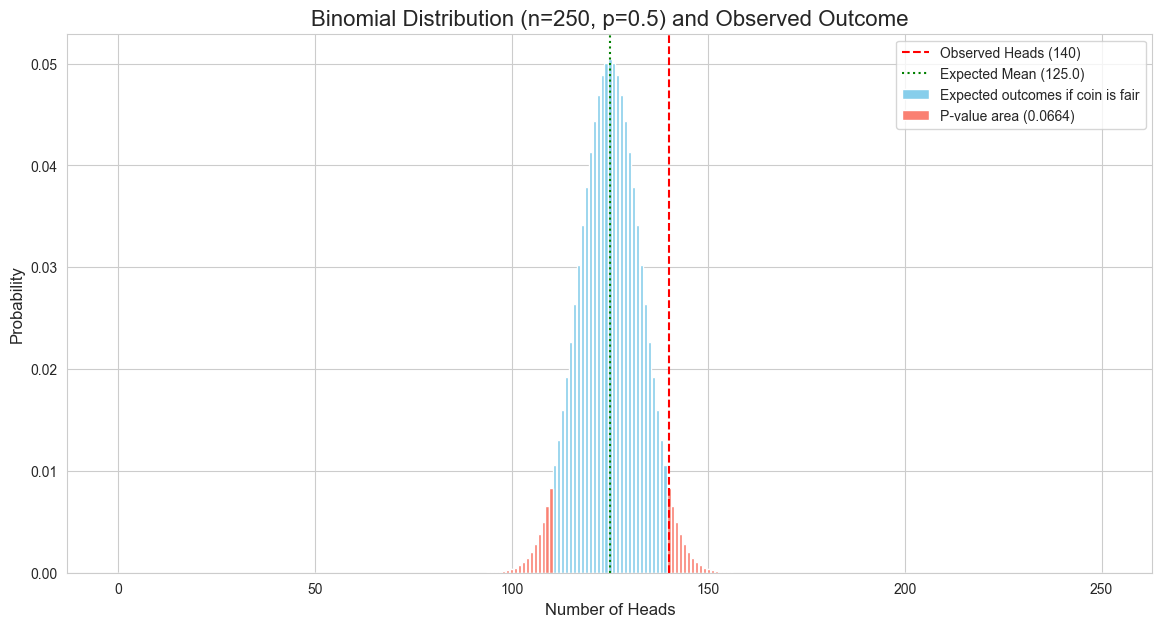

In [8]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")

# 실험 데이터 및 가설
n = 250             # 총 시행 횟수
p_null = 0.5        # 귀무가설: 동전은 공정하다
observed_heads = 140 # 관측된 앞면의 수

# 1. 귀무가설 하의 이항 분포 데이터 생성
# 0부터 250까지 나올 수 있는 모든 앞면의 수
x_values = np.arange(0, n + 1)
# 각 앞면의 수가 나올 확률(확률 질량 함수, PMF)
y_values = binom.pmf(x_values, n, p_null)

# 2. P-value에 해당하는 영역 정의
# P-value는 관측값(140) 이상, 또는 반대쪽 극단(250-140=110) 이하의 확률을 모두 더한 값입니다.
p_value_area_low = (x_values <= n - observed_heads)
p_value_area_high = (x_values >= observed_heads)
p_value = np.sum(y_values[p_value_area_low]) + np.sum(y_values[p_value_area_high])


# 3. 결과 시각화
plt.figure(figsize=(14, 7))

# 전체 분포를 파란색으로 그리기
plt.bar(x_values, y_values, color='skyblue', label='Expected outcomes if coin is fair')
# P-value에 해당하는 극단적인 영역을 붉은색으로 덧칠하기
plt.bar(x_values[p_value_area_low], y_values[p_value_area_low], color='salmon', label=f'P-value area ({p_value:.4f})')
plt.bar(x_values[p_value_area_high], y_values[p_value_area_high], color='salmon')

# 관측된 결과 위치 표시
plt.axvline(x=observed_heads, color='red', linestyle='--', label=f'Observed Heads ({observed_heads})')
plt.axvline(x=n * p_null, color='green', linestyle=':', label=f'Expected Mean ({n*p_null})')

# 그래프 제목 및 레이블 설정
plt.title('Binomial Distribution (n=250, p=0.5) and Observed Outcome', fontsize=16)
plt.xlabel('Number of Heads', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.show()

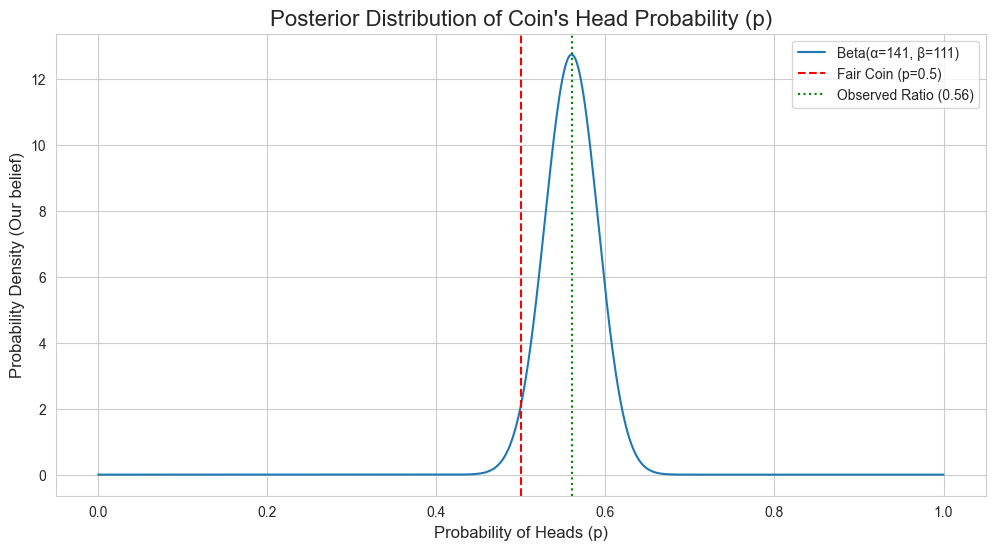

In [4]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")

# 1. 실험 데이터 정의
heads = 140
tails = 110

# 2. 베타 분포의 파라미터 설정
# 베이지안에서는 관측 결과를 파라미터에 더해 믿음을 업데이트합니다.
# (alpha_prior=1, beta_prior=1 로 사전 지식이 없는 상태를 가정)
alpha_post = heads + 1
beta_post = tails + 1

# 3. 확률 변수 p 값의 범위 생성 (0부터 1까지)
p_values = np.linspace(0, 1, 1000)

# 4. 각 p값에 대한 확률 밀도(신뢰도) 계산
# beta.pdf(x, a, b)는 베타 분포의 확률 밀도 함수(PDF)입니다.
posterior_pdf = beta.pdf(p_values, alpha_post, beta_post)

# 5. 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(p_values, posterior_pdf, label=f'Beta(α={alpha_post}, β={beta_post})')

# 그래프를 더 잘 이해하기 위한 추가 정보
# 공정한 동전(p=0.5)의 위치
plt.axvline(x=0.5, color='red', linestyle='--', label='Fair Coin (p=0.5)')
# 관측된 비율(최대 가능도 추정치)
observed_p = heads / (heads + tails)
plt.axvline(x=observed_p, color='green', linestyle=':', label=f'Observed Ratio ({observed_p:.2f})')


plt.title('Posterior Distribution of Coin\'s Head Probability (p)', fontsize=16)
plt.xlabel('Probability of Heads (p)', fontsize=12)
plt.ylabel('Probability Density (Our belief)', fontsize=12)
plt.legend()
plt.show()